In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Bagian Baru

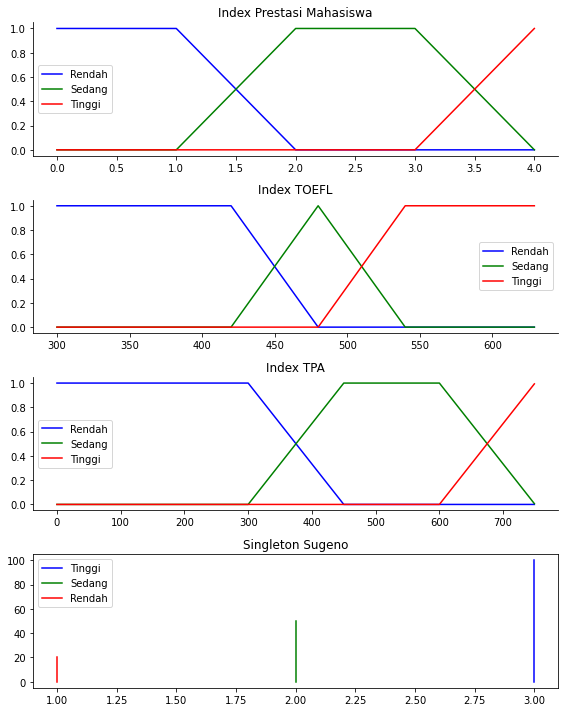

In [ ]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_ipk = np.arange(0, 5, 1)
x_toefl = np.arange(300, 630, 1)
x_tpa  = np.arange(0, 750, 1)

# Generate fuzzy membership functions
ipk_rendah = fuzz.trapmf(x_ipk,[0, 0, 1, 2])
ipk_sedang = fuzz.trapmf(x_ipk,[1, 2, 3, 4])
ipk_tinggi = fuzz.trapmf(x_ipk,[3, 4, 4, 4])

toefl_rendah = fuzz.trapmf(x_toefl,[0, 300, 420, 480])
toefl_sedang = fuzz.trimf(x_toefl,[420, 480, 540])
toefl_tinggi = fuzz.trapmf(x_toefl,[480, 540, 630, 630])

tpa_rendah = fuzz.trapmf(x_tpa,[0, 0, 300, 450])
tpa_sedang = fuzz.trapmf(x_tpa,[300, 450, 600, 750])
tpa_tinggi = fuzz.trapmf(x_tpa,[600, 750, 750, 750])

R = 20
S = 50
T = 100

# Visualize these universes and membership functions//membuat visualisasi grafik
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 10))

ax0.plot(x_ipk, ipk_rendah, 'b', linewidth=1.5, label='Rendah')
ax0.plot(x_ipk, ipk_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_ipk, ipk_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax0.set_title('Index Prestasi Mahasiswa')
ax0.legend()

ax1.plot(x_toefl, toefl_rendah, 'b', linewidth=1.5, label='Rendah')
ax1.plot(x_toefl, toefl_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_toefl, toefl_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax1.set_title('Index TOEFL')
ax1.legend()

ax2.plot(x_tpa, tpa_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_tpa, tpa_sedang, 'g', linewidth=1.5, label='Sedang')
ax2.plot(x_tpa, tpa_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Index TPA')
ax2.legend()

ax3.plot([3, 3],[0, T], 'b', linewidth=1.5, label= 'Tinggi')
ax3.plot([2, 2],[0, S], 'g', linewidth=1.5, label= 'Sedang')
ax3.plot([1, 1],[0, R], 'r', linewidth=1.5, label= 'Rendah')
ax3.set_title('Singleton Sugeno')
ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()

plt.tight_layout()



In [ ]:
##Family
R=20
S=50
T=100
M=[(R,R,R,R,S,T,R,T,T),(R,S,S,S,S,T,T,T,T),(R,T,S,T,S,T,T,T,T)]

# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes…
# This is what fuzz.interp_membership exists for!
##input crisp
in_ipk = 3.3
in_toefl = 490
in_tpa = 320

#fuzzification
in_1 =[]
in_1.append(fuzz.interp_membership(x_ipk, ipk_rendah, in_ipk))
in_1.append(fuzz.interp_membership(x_ipk, ipk_sedang, in_ipk))
in_1.append(fuzz.interp_membership(x_ipk, ipk_tinggi, in_ipk))

in_2 =[]
in_2.append(fuzz.interp_membership(x_toefl, toefl_rendah, in_toefl))
in_2.append(fuzz.interp_membership(x_toefl, toefl_sedang, in_toefl))
in_2.append(fuzz.interp_membership(x_toefl, toefl_tinggi, in_toefl))

in_3 =[]
in_3.append(fuzz.interp_membership(x_tpa, tpa_rendah, in_tpa))
in_3.append(fuzz.interp_membership(x_tpa, tpa_sedang, in_tpa))
in_3.append(fuzz.interp_membership(x_tpa, tpa_tinggi, in_tpa))

print("Derajat Keanggotaan Nilai IPK")
if in_1[0]>0:
  print("Rendah : "+ str(in_1[0]))
if in_1[1]>0:
  print("Sedang : "+ str(in_1[1]))
if in_1[2]>0:
  print("Tinggi : "+ str(in_1[2]))

print("")
print("Derajat Keanggotaan Nilai TOEFL")
if in_2[0]>0:
  print("Rendah : "+ str(in_2[0]))
if in_2[1]>0:
  print("Sedang : "+ str(in_2[1]))
if in_2[2]>0:
  print("Tinggi : "+ str(in_2[2]))\

print("")
print("Derajat Keanggotaan Nilai TPA")
if in_3[0]>0:
  print("Rendah : "+ str(in_3[0]))
if in_3[1]>0:
  print("Sedang : "+ str(in_3[1]))
if in_3[2]>0:
  print("Rendah : "+ str(in_3[2]))
print("Matriks Nilai IPK")
print(in_1)
print("")
print("Matriks Nilai TOEFL")
print(in_2)
print("Matriks Nilai TPA")
print(in_3)

#Inferensi dan Defazzifikasi dengan Metode Sugeno
#Penyebut
rul =[]
for i in range(3) :
  for j in range (3) :
    rule = fuzz.relation_min(in_1[i], in_2[j])
    rul.append(rule)
    penyebut=np.sum(rul)

#Pembilang
rul =[]
for i in range(3) :
  for j in range(3) :
    rule=fuzz.relation_min(in_1[i], in_2[j])
    rulxx=rule*M[i][j]
    rul.append(rulxx)
    pembilang=np.sum(rul)
    hasil = pembilang/penyebut

print ("Index Kelayakan Diterima : "+ str(hasil))
if hasil >=0 and hasil <=20 :
  za = (abs(hasil - 0)/(20-0))*100
  zb = (abs(hasil - 20)/(20-0))*100
  print("Tidak Lulus : "+ '{:2.2f}'.format(zb)+" %")
  print("Tidak Lulus : "+ '{:2.2f}'.format(za)+" %")
if hasil >=20 and hasil <=50 :  
  za = (abs(hasil - 20)/(50-20))*100
  zb = (abs(hasil - 50)/(50-20))*100
  print("Tidak Lulus : "+ '{:2.2f}'.format(zb)+" %")
  print("Waiting List : "+ '{:2.2f}'.format(za)+" %")
if hasil >=50 and hasil <=100 :
  za = (abs(hasil - 50)/(100-50))*100
  zb = (abs(hasil - 100)/(100-50))*100
  print("Waiting List : "+ '{:2.2f}'.format(zb)+" %")
  print("Lulus : "+ '{:2.2f}'.format(za)+" %")

Derajat Keanggotaan Nilai IPK
Sedang : 0.7000000000000002
Tinggi : 0.2999999999999998

Derajat Keanggotaan Nilai TOEFL
Sedang : 0.8333333333333334
Tinggi : 0.16666666666666666

Derajat Keanggotaan Nilai TPA
Rendah : 0.8666666666666667
Sedang : 0.13333333333333333
Matriks Nilai IPK
[0.0, 0.7000000000000002, 0.2999999999999998]

Matriks Nilai TOEFL
[0.0, 0.8333333333333334, 0.16666666666666666]
Matriks Nilai TPA
[0.8666666666666667, 0.13333333333333333, 0.0]
Index Kelayakan Diterima : 61.24999999999999
Waiting List : 77.50 %
Lulus : 22.50 %
